## *Question 1*

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as split_data
from sklearn.preprocessing import StandardScaler

In [62]:
dataset = pd.read_csv("Iris.csv", header=0)
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
def convert(vector):
    visited = []
    ind = 0
    result = []
    for i in vector:
        if i in visited:
            result.append(visited.index(i))
        else:
            visited.append(i)
            result.append(len(visited)-1)
    return result

In [64]:
dataset.iloc[:, -1] = np.array(convert(dataset.iloc[:, -1].tolist()))

In [65]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
x.drop('Id', axis=1, inplace=True)
x.shape

(150, 4)

In [66]:
scaler = StandardScaler()

In [67]:
x = scaler.fit_transform(x)

In [68]:
def covariance_matrix(x):
    return np.dot(x.T, x)/x.shape[0]

In [69]:
c = covariance_matrix(x)
c

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [70]:
#finding eigen-values and eigen-vectors for covariance matrix
def eigen_values_vectors(x):
    eigenValues, eigenVectors = np.linalg.eig(x)
    # sort eigenvalues descending and select columns based on n_components
    n_cols = np.flip(np.argsort(eigenValues))
    selected_eigen_vectors = eigenVectors[:, n_cols]
    return np.flip(np.sort(eigenValues)),selected_eigen_vectors

In [71]:
eigenValues, eigenVectors = eigen_values_vectors(c)
print(eigenValues)
print("\n")
print(eigenVectors)

[2.91081808 0.92122093 0.14735328 0.02060771]


[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [72]:
#Plot the principal components and percentage of explained variances.

explained_variances = [i/np.sum(eigenValues) for i in eigenValues]

print("Sum of  Explained Variance :",np.sum(explained_variances))
print("Explained Variance :", explained_variances)

Sum of  Explained Variance : 1.0
Explained Variance : [0.7277045209380137, 0.23030523267680617, 0.03683831957627382, 0.005151926808906351]


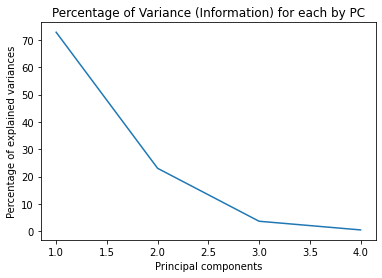

In [73]:
#Plot the principal components and percentage of explained variances.
import matplotlib.pyplot as plt
X_axis = [1,2,3,4]
q = [i*100 for i in explained_variances]

plt.plot(X_axis,q)
plt.xlabel('Principal components')
plt.ylabel('Percentage of explained variances')
plt.title('Percentage of Variance (Information) for each by PC')
plt.show()

In [74]:
#consider only the features upto where the pov adds to <95% here 2
k = 2
eign = eigenVectors[:,:k]
eign

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [75]:
#transform into original matrix
X_transformed = np.dot(eign.T,x.T).T
print("Transformed X :\n", np.around(X_transformed, 2))

Transformed X :
 [[-2.26 -0.51]
 [-2.09  0.66]
 [-2.37  0.32]
 [-2.3   0.58]
 [-2.39 -0.67]
 [-2.07 -1.52]
 [-2.45 -0.07]
 [-2.23 -0.25]
 [-2.34  1.1 ]
 [-2.19  0.45]
 [-2.16 -1.07]
 [-2.33 -0.16]
 [-2.22  0.71]
 [-2.64  0.94]
 [-2.19 -1.89]
 [-2.25 -2.72]
 [-2.2  -1.51]
 [-2.19 -0.51]
 [-1.89 -1.43]
 [-2.34 -1.16]
 [-1.91 -0.43]
 [-2.2  -0.95]
 [-2.77 -0.49]
 [-1.82 -0.11]
 [-2.23 -0.16]
 [-1.96  0.61]
 [-2.05 -0.27]
 [-2.17 -0.55]
 [-2.14 -0.34]
 [-2.27  0.31]
 [-2.14  0.48]
 [-1.83 -0.45]
 [-2.61 -1.83]
 [-2.44 -2.19]
 [-2.19  0.45]
 [-2.21  0.18]
 [-2.04 -0.68]
 [-2.19  0.45]
 [-2.44  0.88]
 [-2.17 -0.29]
 [-2.29 -0.47]
 [-1.87  2.33]
 [-2.56  0.45]
 [-1.96 -0.5 ]
 [-2.13 -1.17]
 [-2.08  0.69]
 [-2.38 -1.15]
 [-2.4   0.36]
 [-2.23 -1.03]
 [-2.21 -0.03]
 [ 1.1  -0.86]
 [ 0.73 -0.6 ]
 [ 1.24 -0.61]
 [ 0.4   1.76]
 [ 1.07  0.21]
 [ 0.38  0.59]
 [ 0.75 -0.78]
 [-0.5   1.85]
 [ 0.93 -0.03]
 [ 0.    1.03]
 [-0.12  2.66]
 [ 0.44  0.06]
 [ 0.55  1.77]
 [ 0.72  0.19]
 [-0.04  0.43]
 [ 0.88 

## *Question 2*

In [76]:
data = pd.read_csv("framingham.csv", header=0)
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [77]:
data = data.dropna() #drop all columns that contains na

In [78]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [79]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [80]:
c2 = np.round(covariance_matrix(X), 2)

In [81]:
eigenValues2, eigenVectors2 = eigen_values_vectors(c2)
eigenValues2 = np.round(eigenValues2, 2)
eigenVectors2 = np.round(eigenVectors2, 2)

In [82]:
explained_variances2 = [i/np.sum(eigenValues2) for i in eigenValues2]

print("Sum of  Explained Variance :",np.sum(explained_variances2))
print("Explained Variance :", explained_variances2)

Sum of  Explained Variance : 0.9999999999999999
Explained Variance : [0.2151898734177215, 0.1252498334443704, 0.10459693537641572, 0.07461692205196535, 0.07061958694203864, 0.0692871419053964, 0.06728847435043304, 0.05796135909393737, 0.05263157894736842, 0.04663557628247834, 0.03864090606262491, 0.025982678214523647, 0.025316455696202528, 0.014656895403064623, 0.011325782811459026]


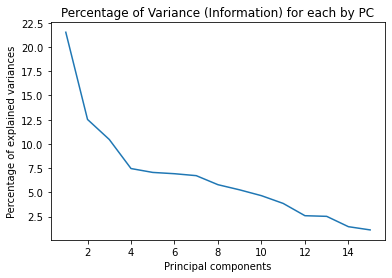

In [83]:
#Plot the principal components and percentage of explained variances.
import matplotlib.pyplot as plt
X_axis2 = [i for i in range(1, 16)]
q2 = [i*100 for i in explained_variances2]

plt.plot(X_axis2,q2)
plt.xlabel('Principal components')
plt.ylabel('Percentage of explained variances')
plt.title('Percentage of Variance (Information) for each by PC')
plt.show()

In [85]:
#consider only the features upto where the pov adds to <95%
k2, sum2 = 0, 0
while sum2 < 95:
    sum2 += q2[k2]
    k2 += 1
k2 -= 1
print("k : ",k2)
eisub2 = eigenVectors2[:,:k2]

k :  12


In [86]:
#splitting the dataset into training and testing sets using sklearn.model_selection
from sklearn.model_selection import train_test_split as split_data

train_X, test_X, train_Y, test_Y = split_data(X, Y, train_size = .9, shuffle=True)
train_X = np.array(train_X)
test_X = np.array(test_X)
train_Y = np.array(train_Y)
test_Y = np.array(test_Y)
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((3290, 15), (366, 15), (3290,), (366,))

In [87]:
# Logistic Regression
# Implement the logic of the algorithm using Gradient Descent Function
# Estimate linear regression coefficients using stochastic gradient descent

In [88]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

In [89]:
def predict(row, theta):
    y_pred = theta[0]
    for i in range(len(row)):
        y_pred += theta[i + 1] * row[i]
    return sigmoid(y_pred)

In [90]:
def gradient_descent(x, y, alpha, epochs):
    theta = [0.0]*(len(x)+1)
    m = y.size
    for epoch in range(epochs):
        for i in range(len(x)-1):
            prec_y = predict(x[i], theta)
            err = y[i] - prec_y
            theta[0] = theta[0] + alpha*err*prec_y*(1-prec_y)
            for j in range(len(x[i])):
                theta[j+1] = theta[j+1] + alpha*err*prec_y*(1-prec_y)*x[i][j]
    return theta

In [91]:
alpha, epochs = 0.12, 1000
theta = gradient_descent(train_X, train_Y, alpha, epochs)

In [92]:
np.round(theta)

array([-2.,  1.,  0., ...,  0.,  0.,  0.])

In [93]:
# predicted_values = [i for i in predict(test_X[j], theta) for j in range(len(test_X))]
# predicted_values = [i for j in range(len(test_X)) for i in predict(test_X[j], theta)]
predicted_values = [predict(test_X[i], theta) for i in range(len(test_X))]
np.round(predicted_values, 3)

array([0.073, 0.186, 0.126, 0.253, 0.044, 0.077, 0.018, 0.187, 0.044,
       0.115, 0.03 , 0.21 , 0.04 , 0.043, 0.045, 0.088, 0.065, 0.022,
       0.042, 0.308, 0.581, 0.028, 0.131, 0.243, 0.173, 0.122, 0.077,
       0.038, 0.145, 0.076, 0.114, 0.024, 0.052, 0.135, 0.187, 0.04 ,
       0.241, 0.022, 0.097, 0.129, 0.059, 0.14 , 0.066, 0.122, 0.223,
       0.028, 0.073, 0.018, 0.116, 0.156, 0.198, 0.046, 0.019, 0.032,
       0.097, 0.057, 0.037, 0.169, 0.102, 0.116, 0.177, 0.258, 0.037,
       0.184, 0.286, 0.035, 0.05 , 0.066, 0.065, 0.031, 0.082, 0.067,
       0.163, 0.33 , 0.163, 0.033, 0.042, 0.553, 0.138, 0.181, 0.055,
       0.097, 0.095, 0.097, 0.079, 0.023, 0.154, 0.099, 0.246, 0.204,
       0.023, 0.024, 0.083, 0.049, 0.238, 0.061, 0.104, 0.017, 0.043,
       0.12 , 0.351, 0.128, 0.063, 0.174, 0.029, 0.018, 0.152, 0.169,
       0.066, 0.035, 0.095, 0.06 , 0.046, 0.118, 0.045, 0.107, 0.038,
       0.048, 0.389, 0.032, 0.018, 0.046, 0.038, 0.285, 0.042, 0.31 ,
       0.065, 0.043,

In [94]:
#loss
error = 0
for i in range(len(test_Y)):
    error += test_Y[i]*np.log(predicted_values[i]) + (1-test_Y[i])*np.log(1-predicted_values[i])
meanError = error/len(test_Y)
meanError

-0.40073528718153123